### Imported Modules and setup

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# CSV file.
USinc = 'US_Average_Income.csv'

# Use the Pandas read_csv function to read the CSV file into a DataFrame.
dfinc = pd.read_csv(USinc)

# Now, 'df' is your DataFrame containing the data from the CSV file.

# You can perform various operations on the DataFrame, for example, printing the first few rows:
print(dfinc.head())

       YEAR  Us Average Income  Average income Change
0  1/1/1974               7255                    0.0
1  1/1/1975               7704                    6.2
2  1/1/1976               8242                    7.0
3  1/1/1977               8886                    7.8
4  1/1/1978               9451                    6.4


### Describe

In [2]:
# Use the describe() method to get summary statistics for numeric columns.
describeinc = dfinc.describe()
print(describeinc)

       Us Average Income  Average income Change
count          49.000000              49.000000
mean        28796.489796               4.414286
std         14730.225515               2.435074
min          7255.000000              -0.400000
25%         16170.000000               2.500000
50%         28240.000000               4.900000
75%         38380.000000               6.200000
max         59430.000000               8.700000


### US Average income graphs

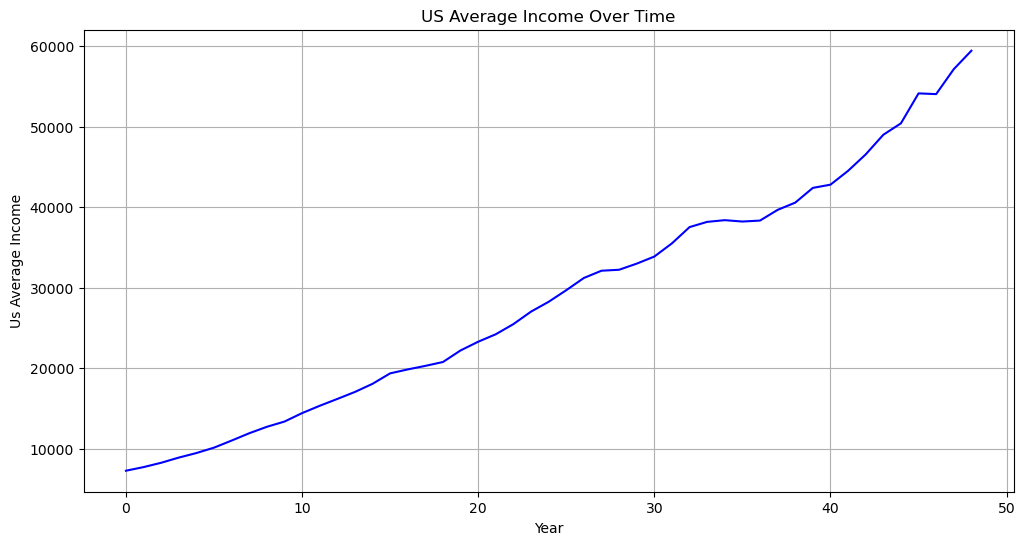

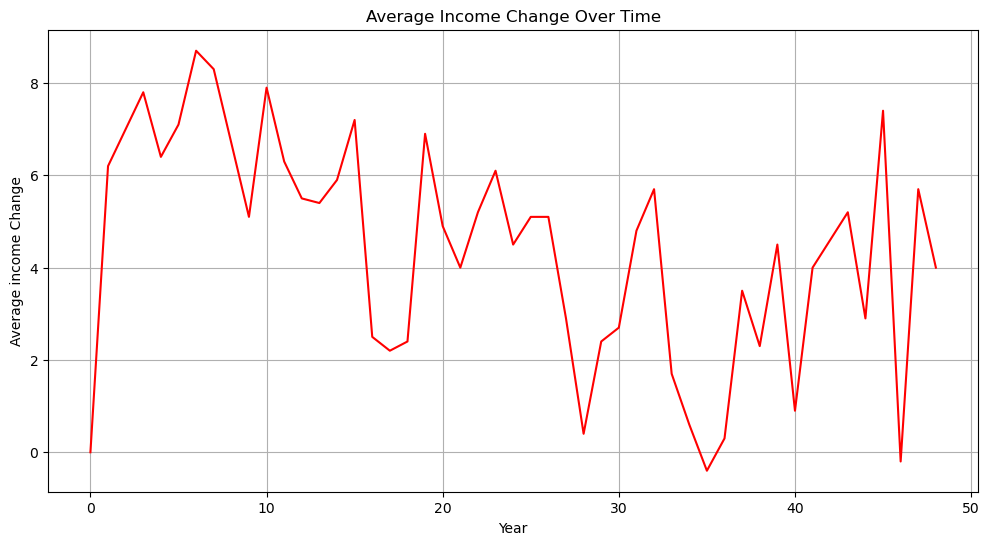

In [4]:
# Create a time series plot for 'Us Average Income'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Us Average Income'], color='blue')
plt.xlabel('Year')
plt.ylabel('Us Average Income')
plt.title('US Average Income Over Time')
plt.grid()
plt.show()

# Create a separate time series plot for 'Average income Change (non Percent)'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Average income Change'], color='red')
plt.xlabel('Year')
plt.ylabel('Average income Change')
plt.title('Average Income Change Over Time')
plt.grid()
plt.show()

### US Average Income Forecasted ARIMA

C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informatio

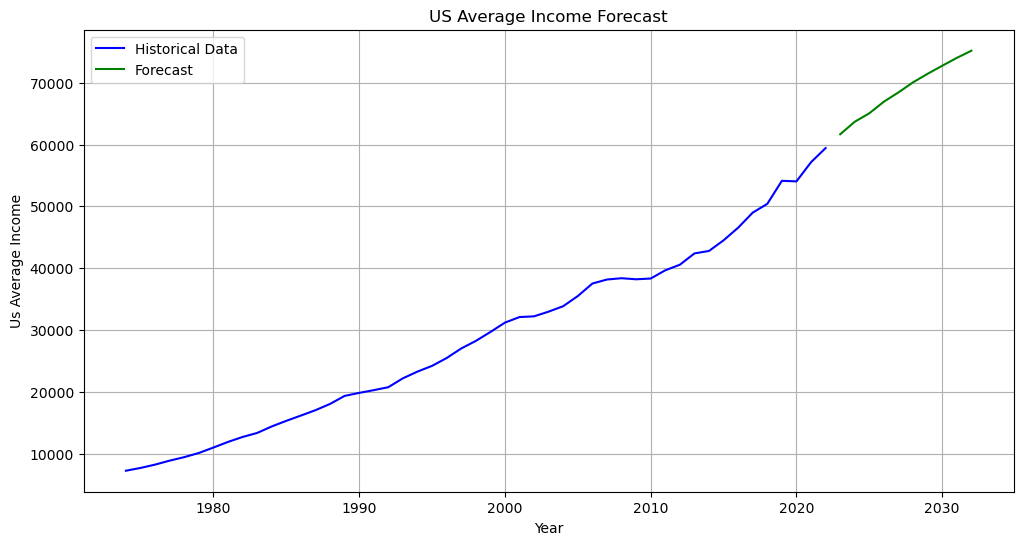

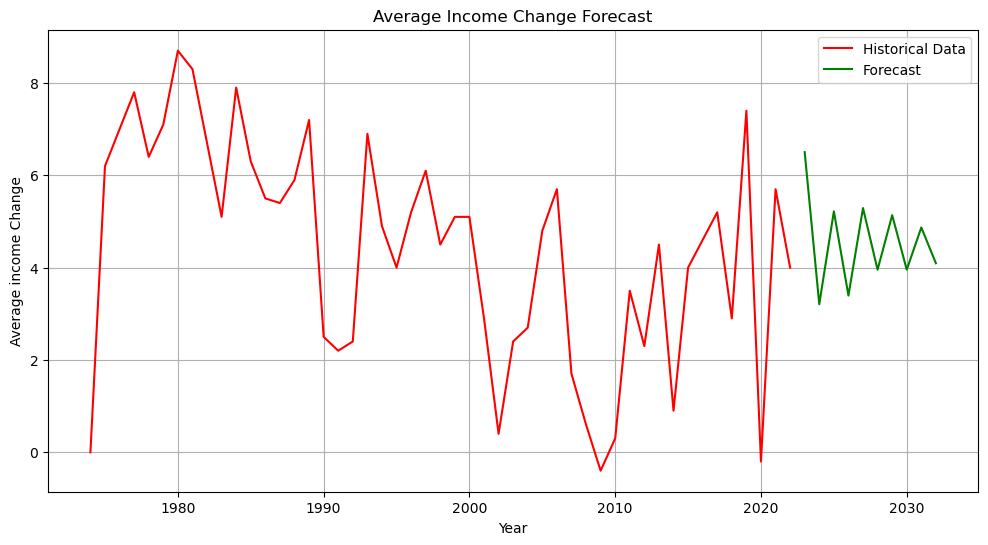

Forecasted 'Us Average Income':
2023-01-01    61657.365711
2024-01-01    63682.565184
2025-01-01    65057.415406
2026-01-01    66931.802926
2027-01-01    68431.179132
2028-01-01    70059.029362
2029-01-01    71440.833380
2030-01-01    72738.037016
2031-01-01    74005.731444
2032-01-01    75165.001854
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Forecasted 'Average income Change':
2023-01-01    6.503067
2024-01-01    3.206821
2025-01-01    5.219115
2026-01-01    3.394625
2027-01-01    5.290946
2028-01-01    3.955067
2029-01-01    5.136727
2030-01-01    3.956351
2031-01-01    4.870577
2032-01-01    4.095700
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [5]:
# Convert the 'Year' column to a datetime object
dfinc['YEAR'] = pd.to_datetime(dfinc['YEAR'])  # Update 'Year' to the actual column name

# Set the 'YEAR' column as the index
dfinc.set_index('YEAR', inplace=True)

# Fit an ARIMA model to the 'Us Average Income' data
model_income = ARIMA(dfinc['Us Average Income'], order=(5, 1, 0))  # You may need to adjust the order
model_income_fit = model_income.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_income = model_income_fit.forecast(steps=10)

# Fit an ARIMA model to the 'Average income Change (non Percent)' data
model_change = ARIMA(dfinc['Average income Change'], order=(5, 1, 0))  # You may need to adjust the order
model_change_fit = model_change.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_change = model_change_fit.forecast(steps=10)

# Create a time series plot for the forecasted 'Us Average Income'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Us Average Income'], color='blue', label='Historical Data')
forecasted_income_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_income_index, forecasted_income, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Us Average Income')
plt.title('US Average Income Forecast')
plt.legend()
plt.grid()
plt.show()

# Create a time series plot for the forecasted 'Average income Change (non Percent)'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Average income Change'], color='red', label='Historical Data')
forecasted_change_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_change_index, forecasted_change, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average income Change')
plt.title('Average Income Change Forecast')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted results for 'Us Average Income'
print("Forecasted 'Us Average Income':")
print(forecasted_income)

# Print the forecasted results for 'Average income Change (non Percent)'
print("\nForecasted 'Average income Change':")
print(forecasted_change)

# Holt Winters Smoothing

C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


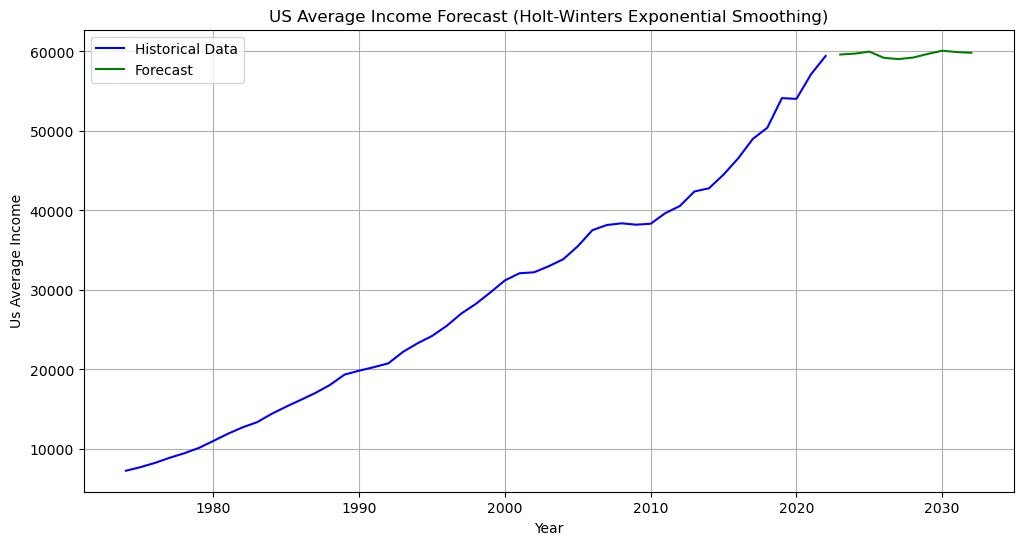

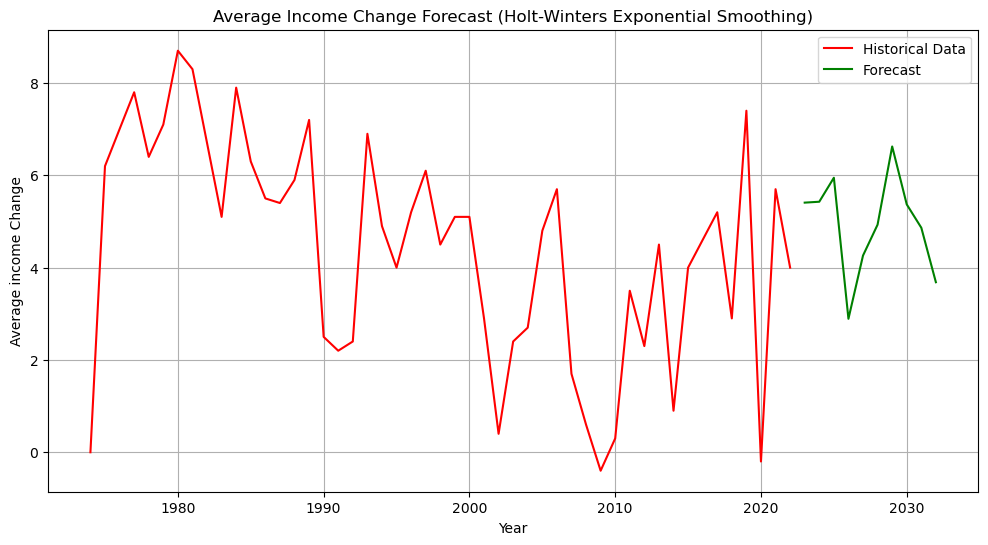

Forecasted 'Us Average Income':
2023-01-01    59622.162624
2024-01-01    59726.914357
2025-01-01    59980.397846
2026-01-01    59200.501350
2027-01-01    59042.537831
2028-01-01    59233.703131
2029-01-01    59688.381864
2030-01-01    60095.595887
2031-01-01    59925.028567
2032-01-01    59836.270046
Freq: AS-JAN, dtype: float64

Forecasted 'Average income Change':
2023-01-01    5.408580
2024-01-01    5.428137
2025-01-01    5.947665
2026-01-01    2.892025
2027-01-01    4.261655
2028-01-01    4.931066
2029-01-01    6.625440
2030-01-01    5.370031
2031-01-01    4.864503
2032-01-01    3.684038
Freq: AS-JAN, dtype: float64


In [7]:
# Convert the 'Year' column to a datetime object
dfinc.index = pd.to_datetime(dfinc.index)

# Fit Holt-Winters Exponential Smoothing model to 'Us Average Income'
model_income = ExponentialSmoothing(dfinc['Us Average Income'], seasonal='add', seasonal_periods=12)
model_income_fit = model_income.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_income = model_income_fit.forecast(steps=10)

# Fit Holt-Winters Exponential Smoothing model to 'Average income Change'
model_change = ExponentialSmoothing(dfinc['Average income Change'], seasonal='add', seasonal_periods=12)
model_change_fit = model_change.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_change = model_change_fit.forecast(steps=10)

# Create a time series plot for the forecasted 'Us Average Income'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Us Average Income'], color='blue', label='Historical Data')
forecasted_income_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_income_index, forecasted_income, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Us Average Income')
plt.title('US Average Income Forecast (Holt-Winters Exponential Smoothing)')
plt.legend()
plt.grid()
plt.show()

# Create a time series plot for the forecasted 'Average income Change (non Percent)'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Average income Change'], color='red', label='Historical Data')
forecasted_change_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_change_index, forecasted_change, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average income Change')
plt.title('Average Income Change Forecast (Holt-Winters Exponential Smoothing)')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted results for 'Us Average Income'
print("Forecasted 'Us Average Income':")
print(forecasted_income)

# Print the forecasted results for 'Average income Change (non Percent)'
print("\nForecasted 'Average income Change':")
print(forecasted_change)